In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Read input file with out header
data = pd.read_csv("spambase.data", header=None)

# print first few records for checking whether data is read correctly or not
#print(file.head()) 

print(data.shape)
nrows = data.shape[0]
ncols = data.shape[1]


(4601, 58)


In [3]:
# Check if there are any missing values
column_total = data.notnull().sum();
#print(column_total)
missing_values = 0
for i in column_total:
    if (i != data.shape[0]):
        print("Missing Values present")
        missing_value += 1
        
print("Number of missing values = ", missing_values)

from sklearn.model_selection import train_test_split

X = data.iloc[:, 0:(ncols-1)]
y = data.iloc[:, (ncols-1)]

X_train, X_test, y_train, y_test = train_test_split( X,y, train_size = 0.05,random_state = 1)

print(X_train.shape)

Number of missing values =  0
(230, 57)


In [4]:
# specifiy attributes and output variable (spam->1, ham->0)

#X
X= X_train.reset_index(drop=True)
y = y_train.reset_index(drop=True)
#print(X)
#y
# IDF(i) =  ln(total number of docuemnts / total number of documents that have the term i), ln -> natural logarithm
idf = np.count_nonzero(X, axis=0)
idf = np.log(nrows/idf)

print(X.index)
print(X.columns)

tf_idf = pd.DataFrame(index=X.index, columns=X.columns)
print(tf_idf.shape)

for i in X.index:
    for j in X.columns:
        #print(i,j)
        tf_idf.iloc[i,j]=X.iloc[i,j]*idf[j]

#print(tf_idf)

RangeIndex(start=0, stop=230, step=1)
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56],
           dtype='int64')
(230, 57)


In [5]:
tf_idf.describe()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
count,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,...,230.0,230.0,230.0,230.0,230.0,230.0,230.0,230.00000,230.00000,230.000000
unique,40.0,33.0,73.0,3.0,73.0,40.0,30.0,35.0,30.0,54.0,...,10.0,30.0,124.0,31.0,107.0,64.0,41.0,201.00000,77.00000,165.000000
top,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.99595,2.99595,14.979748
freq,178.0,188.0,128.0,228.0,139.0,179.0,194.0,189.0,188.0,165.0,...,221.0,198.0,82.0,197.0,118.0,160.0,185.0,16.00000,16.00000,6.000000


In [6]:
tf_idf.mean(axis=0)

0       0.352191
1       0.654836
2       1.011884
3       0.650571
4       1.360999
5       0.428688
6       0.531236
7       0.831416
8       0.368562
9       0.831741
10      0.266418
11      2.030162
12      0.436745
13      0.453910
14      0.317533
15      0.991462
16      0.555646
17      1.111342
18      5.626816
19      0.462754
20      3.305152
21      0.413926
22      0.518161
23      0.588889
24      2.270510
25      1.538229
26      3.186103
27      0.975914
28      0.707954
29      0.830362
30      0.696462
31      0.574206
32      0.532682
33      0.569556
34      0.756361
35      0.788286
36      0.726250
37      0.057861
38      0.550356
39      0.580251
40      0.274049
41      0.465426
42      0.290948
43      0.416738
44      1.267514
45      0.769148
46      0.104184
47      0.172190
48      0.159331
49      0.552954
50      0.159568
51      0.809388
52      0.239249
53      0.122082
54     17.044544
55    168.111852
56    811.550654
dtype: float64

In [7]:
tf_idf.std(axis=0)

0        0.918489
1        4.501529
2        1.560673
3        9.779627
4        2.469388
5        1.095980
6        1.689791
7        3.991772
8        1.030453
9        1.852957
10       0.809398
11       3.121263
12       1.368998
13       2.562962
14       1.534008
15       2.593859
16       1.592936
17       2.596653
18       5.616193
19       2.429406
20       4.874433
21       4.479395
22       1.661487
23       2.948712
24       6.345423
25       4.231655
26      13.863132
27       3.679195
28       3.020600
29       3.105770
30       3.272059
31       3.231951
32       2.738828
33       3.270323
34       3.191346
35       3.044028
36       1.896997
37       0.576369
38       2.313212
39       2.836357
40       1.655491
41       2.332192
42       1.290049
43       2.555685
44       4.086877
45       2.801895
46       1.005576
47       1.973016
48       1.308218
49       0.838980
50       1.344932
51       1.593609
52       0.494316
53       0.556296
54      88.611908
55     411

In [8]:
tf_idf.var(axis=0)

0     8.436215e-01
1     2.026377e+01
2     2.435701e+00
3     9.564110e+01
4     6.097876e+00
5     1.201173e+00
6     2.855395e+00
7     1.593425e+01
8     1.061834e+00
9     3.433450e+00
10    6.551256e-01
11    9.742283e+00
12    1.874155e+00
13    6.568772e+00
14    2.353181e+00
15    6.728104e+00
16    2.537444e+00
17    6.742606e+00
18    3.154162e+01
19    5.902016e+00
20    2.376010e+01
21    2.006498e+01
22    2.760538e+00
23    8.694902e+00
24    4.026439e+01
25    1.790690e+01
26    1.921864e+02
27    1.353648e+01
28    9.124027e+00
29    9.645809e+00
30    1.070637e+01
31    1.044551e+01
32    7.501177e+00
33    1.069501e+01
34    1.018469e+01
35    9.266106e+00
36    3.598599e+00
37    3.322016e-01
38    5.350952e+00
39    8.044920e+00
40    2.740651e+00
41    5.439118e+00
42    1.664226e+00
43    6.531524e+00
44    1.670256e+01
45    7.850615e+00
46    1.011184e+00
47    3.892794e+00
48    1.711434e+00
49    7.038876e-01
50    1.808843e+00
51    2.539589e+00
52    2.4434

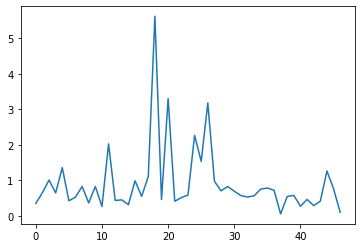

In [9]:
plt.plot(tf_idf.mean(axis=0)[:47])

In [10]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
# Apply 10-Fold Cross Validation Set
cv = KFold(n_splits=10, random_state=None, shuffle=False)

for train_index, test_index in cv.split(X):
    #print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X.iloc[train_index,:], X.iloc[test_index,:], y.iloc[train_index,:], y.iloc[test_index,:]
    nb.fit(X_train,y_train)
    result = nb.predict(X_test)
    print("Result", result)
    

Test Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


IndexingError: Too many indexers

In [12]:
print(nb.score(x_test,y_test))

NameError: name 'x_test' is not defined